# Tennis Ace
## Project Goals
You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the Association of Tennis Professionals (ATP) data, you will determine what it takes to be one of the best tennis players in the world.

1. Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("tennis_stats.csv")

print(df.head())
print(df.info()) #There aren´t missing values.

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

2. Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

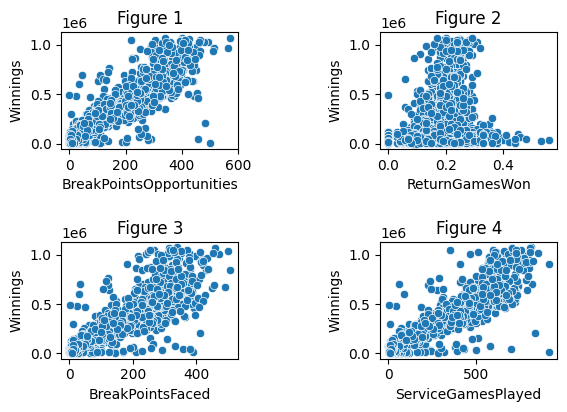

<Figure size 640x480 with 0 Axes>

In [12]:
import seaborn as sns

plt.subplot(2, 2, 1)
sns.scatterplot(x="BreakPointsOpportunities", y="Winnings", data=df)
plt.title("Figure 1")

plt.subplot(2, 2, 2)
sns.scatterplot(x="ReturnGamesWon", y="Winnings", data=df)
plt.title("Figure 2")

plt.subplot(2, 2, 3)
sns.scatterplot(x="BreakPointsFaced", y="Winnings", data=df)
plt.title("Figure 3")

plt.subplot(2, 2, 4)
sns.scatterplot(x="ServiceGamesPlayed", y="Winnings", data=df)
plt.title("Figure 4")

plt.subplots_adjust(wspace=0.8, bottom=0.2, hspace=0.8)
plt.show()
plt.clf()

#There is a strong relationship between BreakPointsOpportunities and Winnings (figure 1),
#and also there is a relationship between the varaiables of the figure 3 and 4.

3. Use one feature from the dataset to build a single feature linear regression model on the data. Your model, at this point, should use only one feature and predict one of the outcome columns. Before training the model, split your data into training and test datasets so that you can evaluate your model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

BreakPointsOpportunities Test score:
0.8165810511001663
BreakPointsOpportunities Train score:
0.8089295136974619


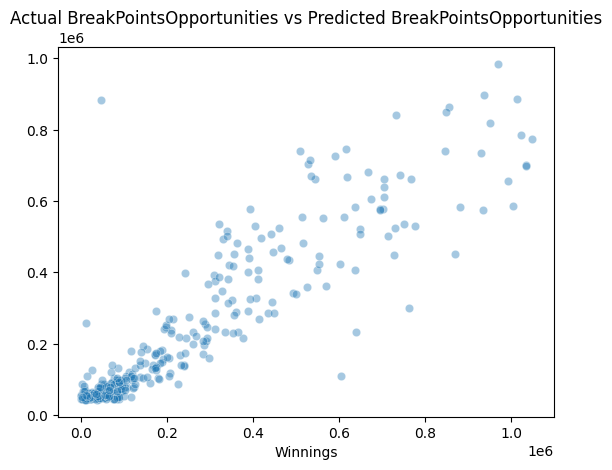

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[["BreakPointsOpportunities"]]
y = df.Winnings

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

ols_slr = LinearRegression()

ols_slr.fit(x_train, y_train)

print("BreakPointsOpportunities Test score:")
print(ols_slr.score(x_test,y_test)) #Over 0.7 is considered a good accuracy, so in this case we have a good accuracy.
print("BreakPointsOpportunities Train score:")
print(ols_slr.score(x_train,y_train))

y_predicted = ols_slr.predict(x_test)
sns.scatterplot(x=y_test, y=y_predicted, alpha=0.4)
plt.title("Actual BreakPointsOpportunities vs Predicted BreakPointsOpportunities")
plt.show()
plt.clf()

4. Create a few more linear regression models that use one feature to predict one of the outcomes. Which model that you create is the best?

ServiceGamesPlayed test score:
0.8472987458516346
ServiceGamesPlayed train score:
0.8302567156687665


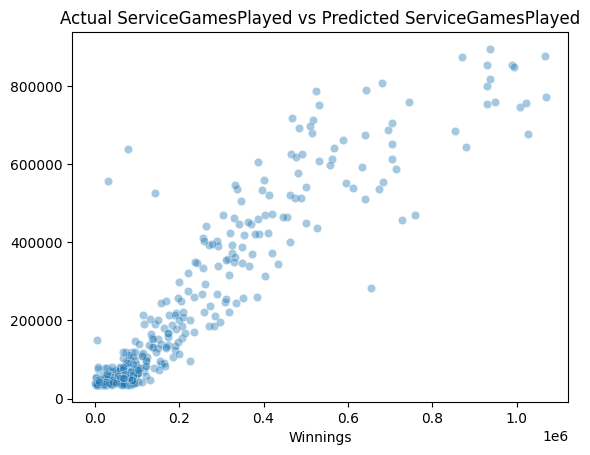

<Figure size 640x480 with 0 Axes>

In [ ]:
X_1 = df[["ServiceGamesPlayed"]]

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(X_1, y, train_size = 0.8, test_size = 0.2)

ols_slr_1 = LinearRegression()

ols_slr_1.fit(x_train_1, y_train_1)

print("ServiceGamesPlayed test score:")
print(ols_slr_1.score(x_test_1,y_test_1)) #The first model has a "better" accuracy, but it is slightly different because both variables have a strong relationship.
print("ServiceGamesPlayed train score:")
print(ols_slr_1.score(x_train_1,y_train_1))

y_predicted_1 = ols_slr_1.predict(x_test_1)
sns.scatterplot(x=y_test_1, y=y_predicted_1, alpha=0.4)
plt.title("Actual ServiceGamesPlayed vs Predicted ServiceGamesPlayed")
plt.show()
plt.clf()

5. Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

Aces and ReturnGamesWon test score:
0.696499228818676
Aces and ReturnGamesWon train score:
0.6585938961241782


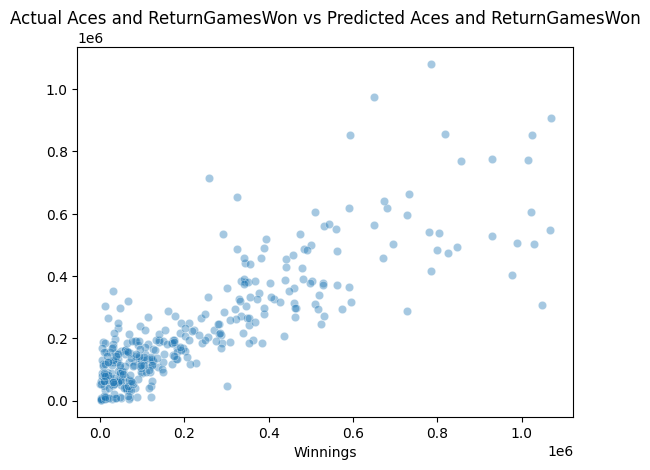

BreakPointsOpportunities and BreakPointsFaced test score:
0.8110173186132486
BreakPointsOpportunities and BreakPointsFaced train score:
0.8103101278869873


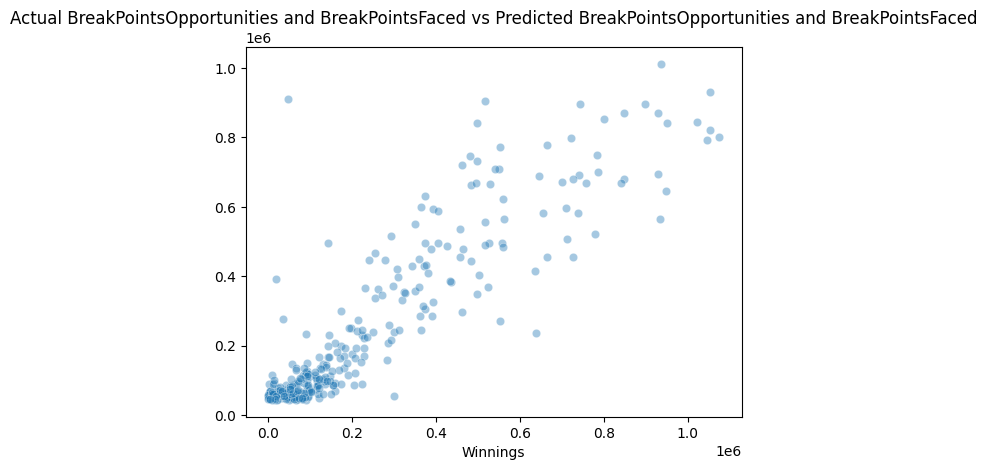

<Figure size 640x480 with 0 Axes>

In [15]:
X_2 = df[["Aces", "ReturnGamesWon"]] #In this case the both features do not have a strong relationship, so, let´s check.

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, train_size = 0.8, test_size = 0.2)

ols_slr_2 = LinearRegression()

ols_slr_2.fit(x_train_2, y_train_2)

print("Aces and ReturnGamesWon test score:")
print(ols_slr_2.score(x_test_2,y_test_2)) #The first model performs "better", but the difference is just of 0.1.
print("Aces and ReturnGamesWon train score:")
print(ols_slr_2.score(x_train_2,y_train_2))

y_predicted_2 = ols_slr_2.predict(x_test_2)
sns.scatterplot(x=y_test_2, y=y_predicted_2, alpha=0.4)
plt.title("Actual Aces and ReturnGamesWon vs Predicted Aces and ReturnGamesWon")
plt.show()
plt.clf()


X_3 = df[["BreakPointsOpportunities", "BreakPointsFaced"]] #In this case both features have a strong relationship, so, let´s check.

x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, train_size = 0.8, test_size = 0.2)

ols_slr_3 = LinearRegression()

ols_slr_3.fit(x_train_3, y_train_3)

print("BreakPointsOpportunities and BreakPointsFaced test score:")
print(ols_slr_3.score(x_test_3,y_test_3))
print("BreakPointsOpportunities and BreakPointsFaced train score:")
print(ols_slr_3.score(x_train_3,y_train_3))

y_predicted_3 = ols_slr_3.predict(x_test_3)
sns.scatterplot(x=y_test_3, y=y_predicted_3, alpha=0.4)
plt.title("Actual BreakPointsOpportunities and BreakPointsFaced vs Predicted BreakPointsOpportunities and BreakPointsFaced")
plt.show()
plt.clf()


#As we can see, the model X_2 (where all the features haven´t a strong relationship) does not perform as well as
# the model X_3 (where all the features have a strong relationship)

6. Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

BreakPointsOpportunities, BreakPointsFaced and ServiceGamesPlayed test score:
0.8637055119528274
BreakPointsOpportunities, BreakPointsFaced and ServiceGamesPlayed train score:
0.8310888319707027


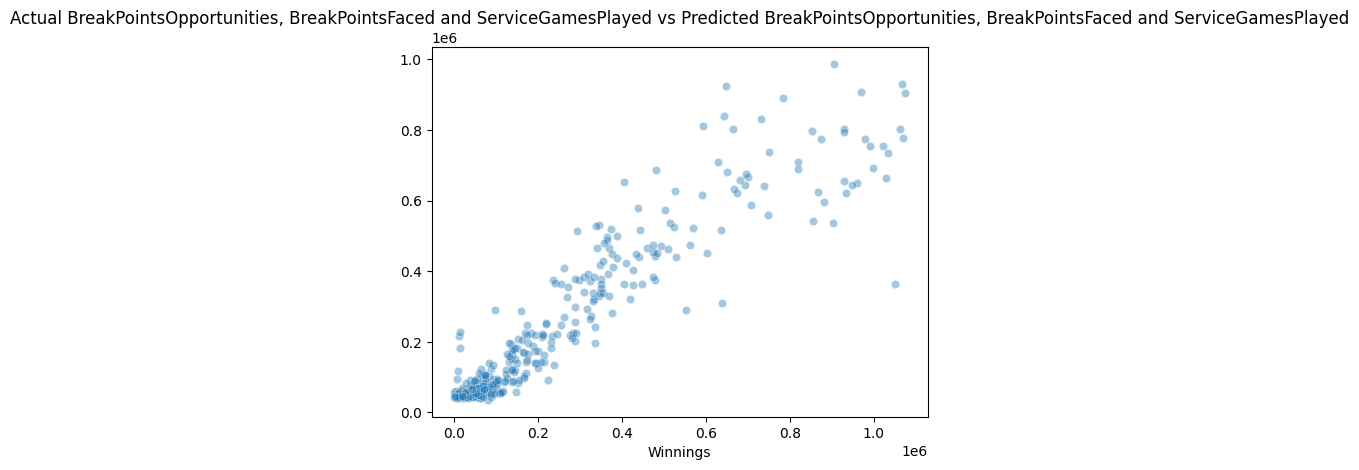

<Figure size 640x480 with 0 Axes>

In [16]:
X_4 = df[["BreakPointsOpportunities", "BreakPointsFaced", "ServiceGamesPlayed"]] #In this case the three features have a strong relationship, so, let´s check.

x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(X_4, y, train_size = 0.8, test_size = 0.2)

ols_slr_4 = LinearRegression()

ols_slr_4.fit(x_train_4, y_train_4)

print("BreakPointsOpportunities, BreakPointsFaced and ServiceGamesPlayed test score:")
print(ols_slr_4.score(x_test_4,y_test_4))
print("BreakPointsOpportunities, BreakPointsFaced and ServiceGamesPlayed train score:")
print(ols_slr_4.score(x_train_4,y_train_4))

y_predicted_4 = ols_slr_4.predict(x_test_4)
sns.scatterplot(x=y_test_4, y=y_predicted_4, alpha=0.4)
plt.title("Actual BreakPointsOpportunities, BreakPointsFaced and ServiceGamesPlayed vs Predicted BreakPointsOpportunities, BreakPointsFaced and ServiceGamesPlayed")
plt.show()
plt.clf()

#The model X_4 has a good accuracy.